<a href="https://colab.research.google.com/github/anooprnathblq/DSA_Python/blob/main/Anoop__Assigment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [219]:
df=pd.read_csv('/content/Wine_clust.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [221]:
#No null values and all are numeric in type

In [222]:
df.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [223]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [224]:
x=df.copy()

In [225]:
#Using K-means for clustering
#Using elbow method to find k value

In [226]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42,n_init='auto')
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

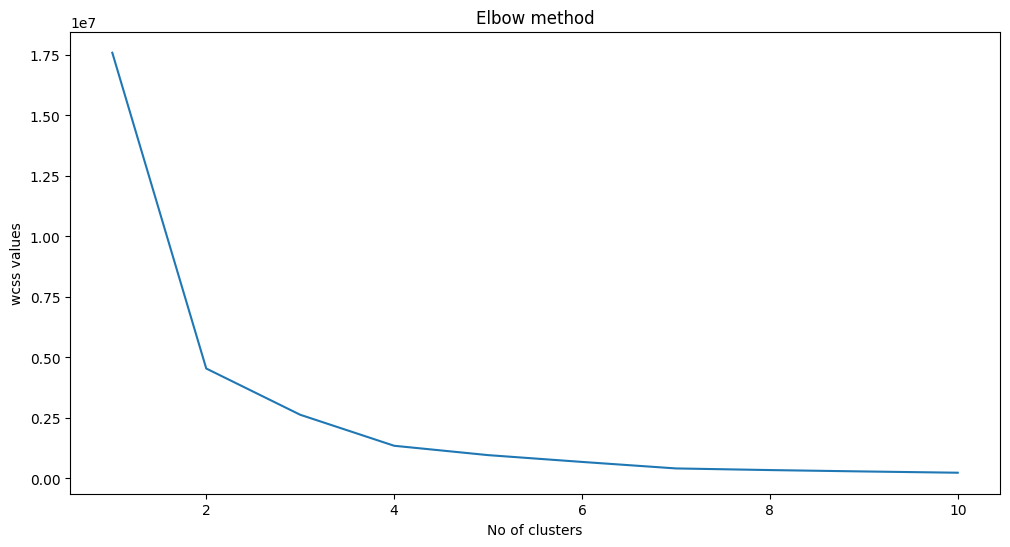

In [227]:
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss values')
plt.show()

In [228]:
#trying values 2,4,6from elbow method t is observed that vlaue 2 gives a a better silhoutte score

In [229]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42,n_init='auto')
y_pred=kmeans.fit_predict(x)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [230]:
#finding the silhotte score
from sklearn.metrics import silhouette_score
silhouette_score(x,y_pred)

0.6568536504294317

In [231]:
#Going with scaling and PCA for feature extraction

In [232]:
from sklearn import set_config
set_config(transform_output='pandas')
#applying standard scaler to all columns in df
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_df=sc.fit_transform(df)
x_scaled=scaled_df.copy()
x_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [233]:
#Going for PCA

In [234]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_scaled)

In [235]:
test=PCA().fit_transform(x_scaled)

In [236]:
test.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


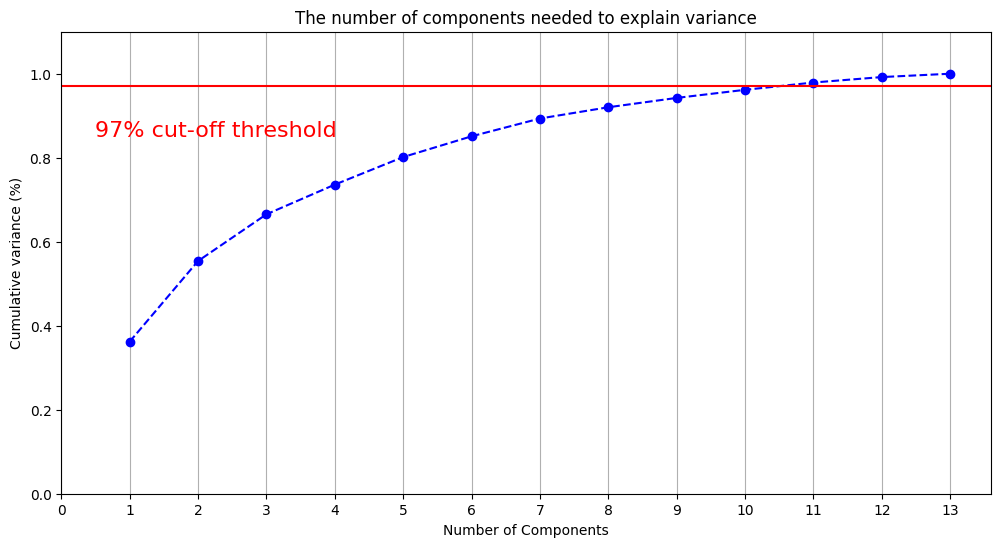

In [237]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 14, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [238]:
pca = PCA(n_components = 2) #2 is chosen as it is found to give the best silhoutte score
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)
x_pca.shape

(178, 2)

In [239]:
#elbow method to find the number of clusters with PCA as input
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42,n_init='auto')
  kmeans.fit(x_pca)
  wcss.append(kmeans.inertia_)

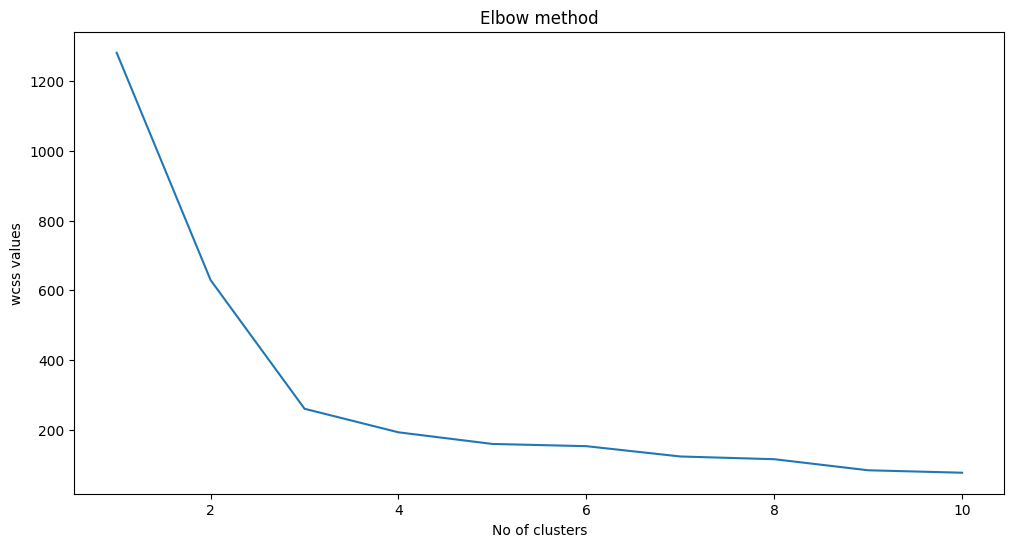

In [240]:
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss values')
plt.show()

In [241]:
#Fixing number of clusters as 3 from elbow diagram
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42,n_init='auto')
y_pca=kmeans.fit_predict(x_pca)
y_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [242]:
x_arr=np.array(x_pca)

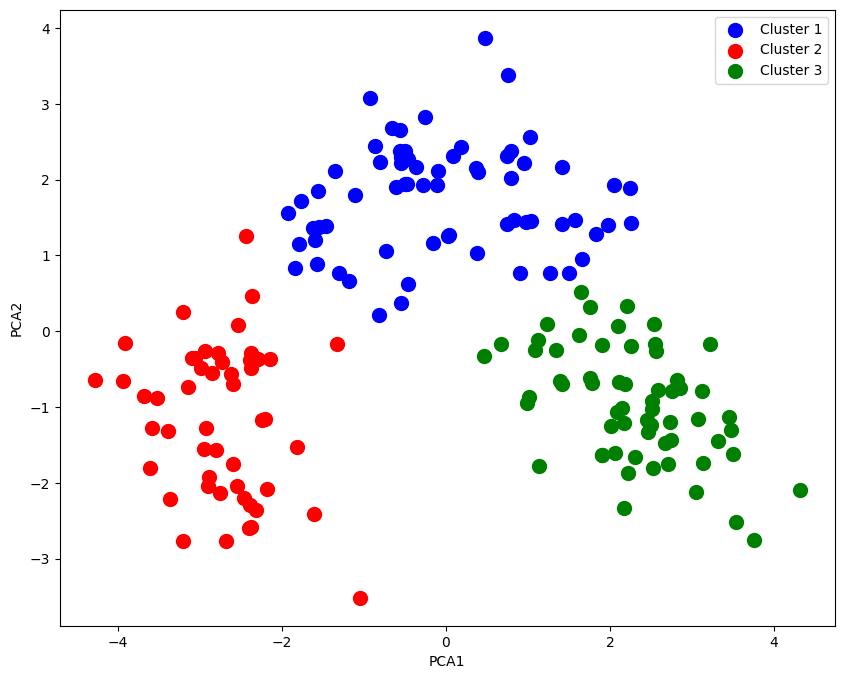

In [243]:
plt.figure(figsize=(10,8))
plt.scatter(x_arr[y_pca == 0, 0], x_arr[y_pca == 0, 1],  s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x_arr[y_pca == 1, 0], x_arr[y_pca == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(x_arr[y_pca == 2, 0], x_arr[y_pca == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [244]:
#finding the silhotte score
silhouette_score(x_pca,y_pca)

0.5601697480957203

In [245]:
#########AGGLOMERATIVE CLUSTERING#########

In [246]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [247]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [248]:
mergings=linkage(x,method='ward')

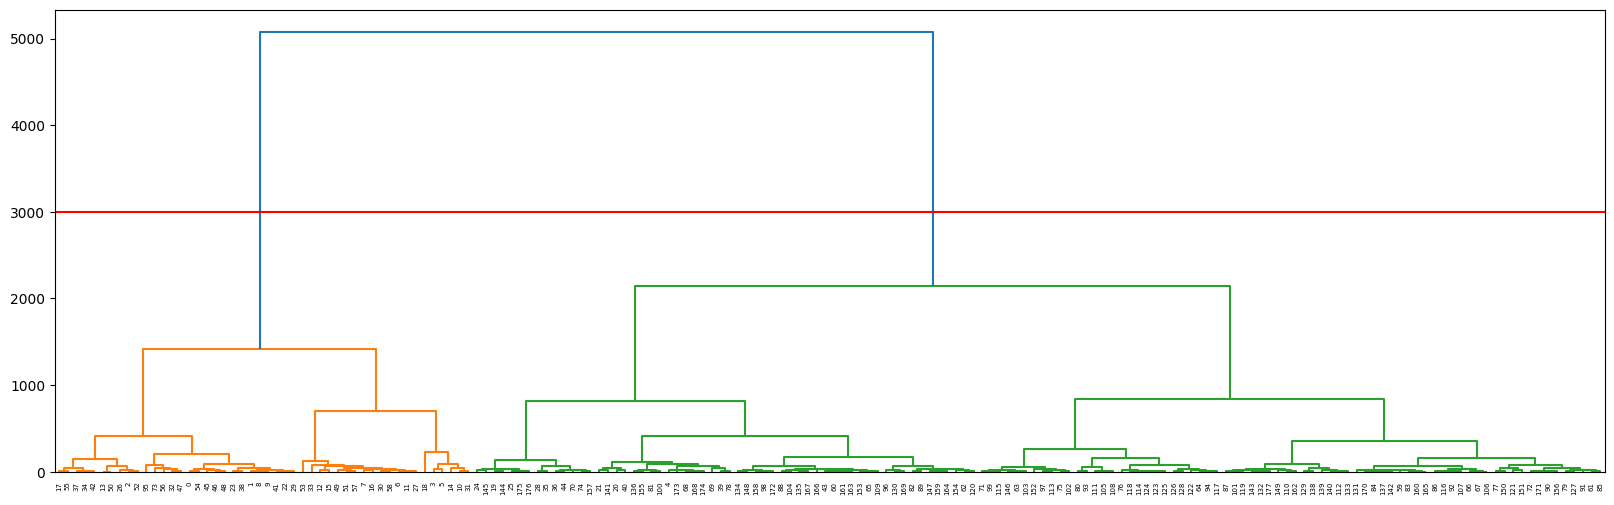

In [249]:
#drwaing the dendrogram
plt.figure(figsize=(20,6))
dendrogram(mergings)
plt.axhline(3000,color='red')
plt.show()

In [250]:
#NUmber of clusters taken as 2 from the above dendrogram

In [251]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [252]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [253]:
##FInding the #Silhoutte Score
silhoutte_avg=silhouette_score(x,y_hc)
print('agglomerative:',silhoutte_avg)

agglomerative: 0.6587292996216912


In [254]:
####With PCA#########

In [255]:
mergings=linkage(x_pca,method='ward')

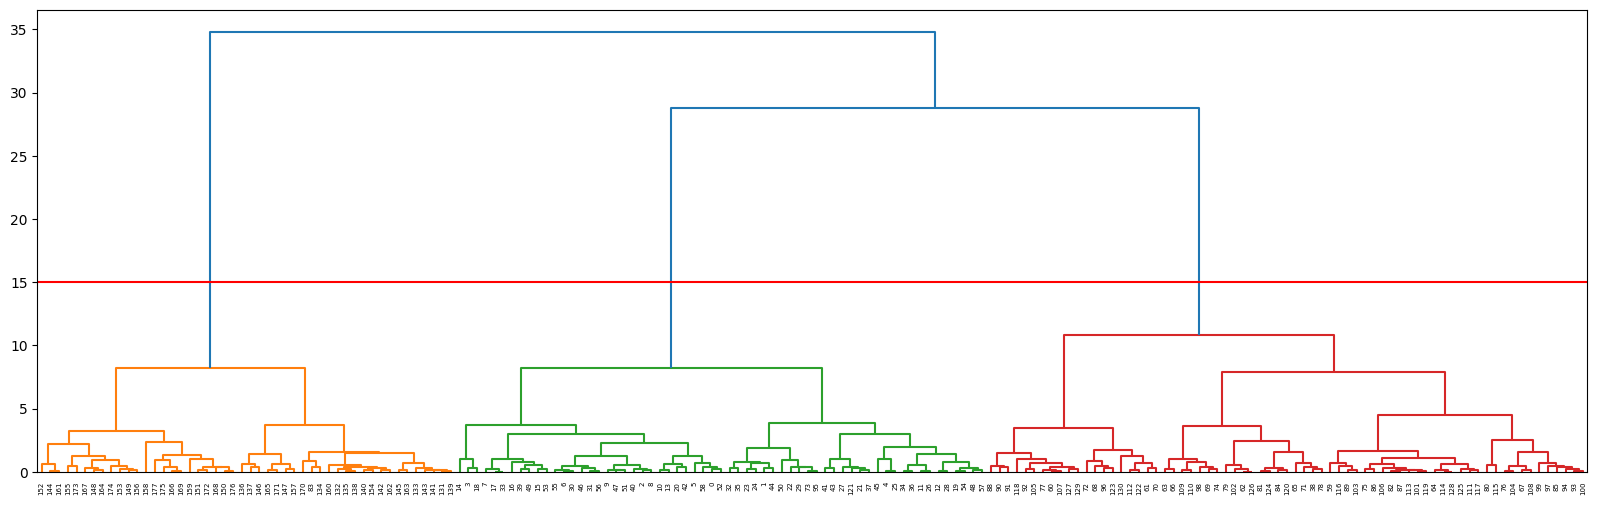

In [256]:
#drwaing the dendrogram
plt.figure(figsize=(20,6))
dendrogram(mergings)
plt.axhline(15,color='red')
plt.show()

In [257]:
##NUmber of clusters taken as 3 from the above dendrogram

In [258]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_pca=hc.fit_predict(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [259]:
y_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [260]:
##FInding the #Silhoutte Score
silhoutte_avg=silhouette_score(x_pca,y_pca)
print('agglomerative:',silhoutte_avg)

agglomerative: 0.5590883962040384


In [261]:
###########DB SCAN ######################

In [262]:
##As the datas are availble in different scales it is better to use the scaled data

In [263]:
from sklearn.cluster import DBSCAN

In [264]:
db=DBSCAN(eps=1.8,min_samples=2) ## hypertuning epsilon and minpoints
clusters=db.fit_predict(x_scaled)
np.count_nonzero(clusters==-1)

76

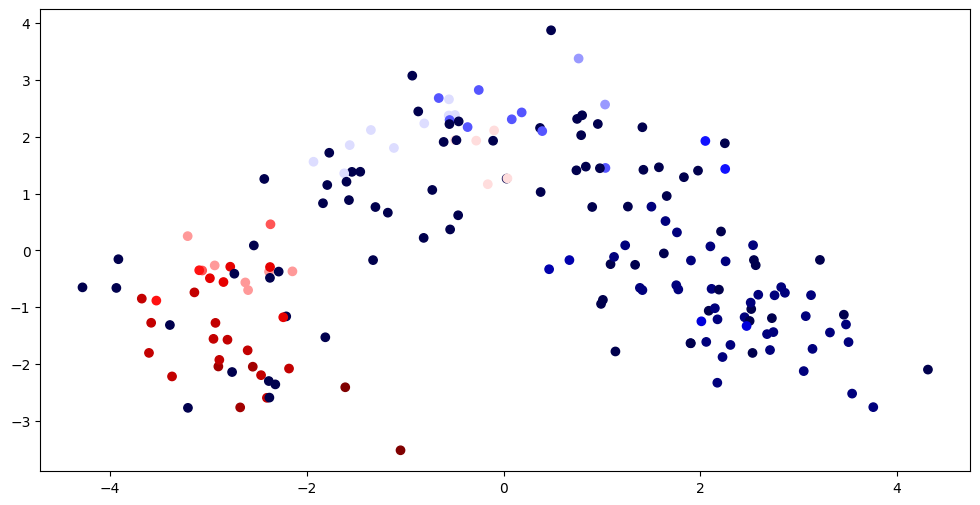

In [265]:
plt.scatter(x_arr[:,0],x_arr[:,1],c=clusters,cmap='seismic')
plt.show()

In [266]:
silhoutte_avg=silhouette_score(x_scaled,clusters)
print('DBScan:',silhoutte_avg)

DBScan: -0.11049883147816271


In [267]:
##As no good silhoute scores are being obtained going forward with PCA

In [314]:
db=DBSCAN(eps=.55,min_samples=5) ## hypertuning epsilon and minpoints
clusters=db.fit_predict(x_pca)
np.count_nonzero(clusters==-1)

23

In [315]:
x_pca_arr=np.array(x_pca)

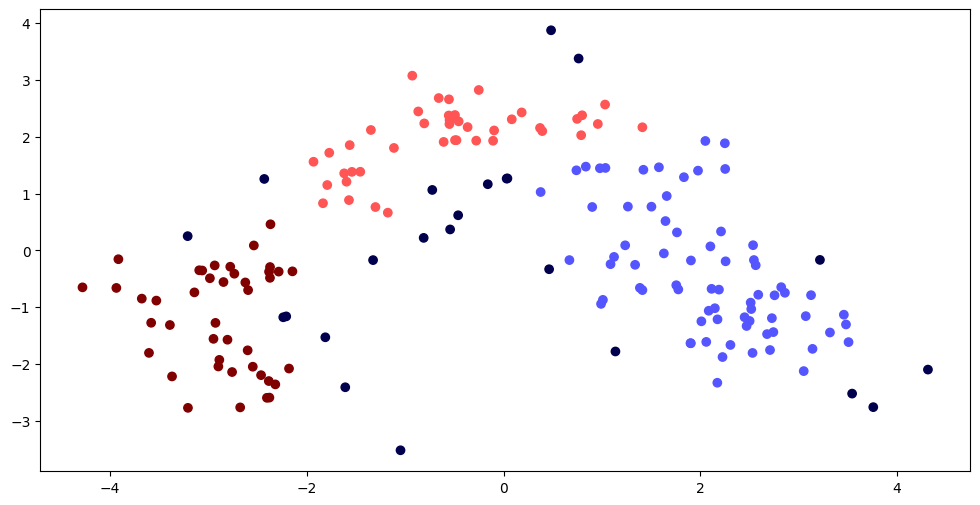

In [316]:
plt.scatter(x_pca_arr[:,0],x_pca_arr[:,1],c=clusters,cmap='seismic')
plt.show()

In [317]:
##FInding the #Silhoutte Score
silhoutte_avg=silhouette_score(x_pca,clusters)
print('DBScan:',silhoutte_avg)

DBScan: 0.40815942562739777


In [318]:
#number of clusters in dbscan
len(set(clusters))

4

In [320]:
set(clusters)

{-1, 0, 1, 2}

In [ ]:
#avoiding outliers number of clusters =3

Summary:
K-means      --number of clusters-2  Silhoutte score-0.65
K-means( PCA)--number of clusters-3  Silhoutte score-0.56
Agglo     -----number of clusters-2  Silhoutte score-0.65
Agglo (PCA)----number of clusters-3  Silhoutte score-0.55
DB_SCan(PCA) --number of clusters-3  Silhoutte score-0.41
So in this case it seems better to go with K-means or agglomerative and better not to go for PCA as it is yielding only lesser   Silhoutte score
